In [1]:
import pandas as pd
import matplotlib.pyplot as plt

***La tabla Riesgo asocado contiene el histórico de cada persona sobre los criterios (clinimetrías y otras mediciones) registrados cada consulta para clasificar su nivel de riesgo***

In [2]:
df_Riesgo_asociado = pd.read_excel("data/Riesgo asociado.xlsx")
print(df_Riesgo_asociado.columns)

Index(['ID', 'Fecha', 'Resultado Total', 'Pregunta', 'Respuesta',
       'Sede de atención'],
      dtype='object')


In [3]:
df_Riesgo_asociado

,ID,Fecha,Resultado Total,Pregunta,Respuesta,Sede de atención
0,2514536,2020-04-22 10:44:02,No Aplica,Terapia biológica -> Tratamiento activo,0,Almacentro Piso 11
1,2514536,2020-04-22 10:44:02,No Aplica,Terapia biológica -> Medicamento que requiere ...,0,Almacentro Piso 11
2,2514536,2020-04-22 10:44:02,No Aplica,PASI -> > 15 sin tratamiento previo,0,Almacentro Piso 11
3,2514536,2020-04-22 10:44:02,No Aplica,DLQI -> > 10,0,Almacentro Piso 11
4,2514536,2020-04-22 10:44:02,No Aplica,Terapia sistématica previa -> Tratamiento prev...,0,Almacentro Piso 11
...,...,...,...,...,...,...
85133,3430743,2020-05-30 12:19:46,Riesgo Alto,IMC -> 26-29,NO,Almacentro Piso 11
85134,3430743,2020-05-30 12:19:46,Riesgo Alto,Dislipidemia -> (Hipercolesterolemia Y/o hiper...,NO,Almacentro Piso 11
85135,3430743,2020-05-30 12:19:46,Riesgo Alto,Terapia sistémica de primera línea -> Tratamie...,NO,Almacentro Piso 11
85136,3430743,2020-05-30 12:19:46,Riesgo Alto,Artritis psoriasica -> Diagnostico confirmado,NO,Almacentro Piso 11


In [4]:
IDs_Unicos=df_Riesgo_asociado[['ID','Resultado Total','Fecha']].copy()
IDs_Unicos=IDs_Unicos.drop_duplicates(keep="first").reset_index().sort_values('ID',ascending=True)
#IDs_Unicos=IDs_Unicos.drop_duplicates(keep="first").sort_values('ID',ascending=True)
#IDs_Unicos.drop('index',axis=1,inplace=True)
IDs_Unicos
#IDs_Unicos.pivot(values='index',index='ID',columns='Resultado Total')
table=pd.pivot_table(IDs_Unicos,values='Fecha',index='ID',columns='Resultado Total',aggfunc='max')
df_IDs_Unicos=pd.DataFrame(data=table)
df_IDs_Unicos

Resultado Total,No Aplica,Riesgo Alto,Riesgo Intermedio
ID,,,
501053,NaT,NaT,2019-03-04 13:59:13
502369,NaT,2020-01-29 09:03:32,NaT
506165,NaT,2019-09-16 13:45:41,NaT
510859,NaT,NaT,2019-08-12 14:32:39
512876,NaT,2019-08-09 07:37:47,2019-10-18 08:55:00
...,...,...,...
3495945,NaT,2020-05-13 09:21:48,NaT
3496124,NaT,2019-10-18 14:50:00,2020-05-15 14:55:43
3497975,NaT,2019-02-15 07:27:57,NaT


In [5]:
df_ra_g0=IDs_Unicos.groupby(['ID','Resultado Total'],as_index=True).count()['Fecha'].unstack('Resultado Total')
df_ra_g0.fillna(0,inplace=True)
df_ra_g0['Consultas_totales']=df_ra_g0['No Aplica']+df_ra_g0['Riesgo Alto']+df_ra_g0['Riesgo Intermedio']
df_ra_g0

Resultado Total,No Aplica,Riesgo Alto,Riesgo Intermedio,Consultas_totales
ID,,,,
501053,0.0,0.0,1.0,1.0
502369,0.0,5.0,0.0,5.0
506165,0.0,3.0,0.0,3.0
510859,0.0,0.0,1.0,1.0
512876,0.0,1.0,1.0,2.0
...,...,...,...,...
3495945,0.0,3.0,0.0,3.0
3496124,0.0,2.0,1.0,3.0
3497975,0.0,2.0,0.0,2.0


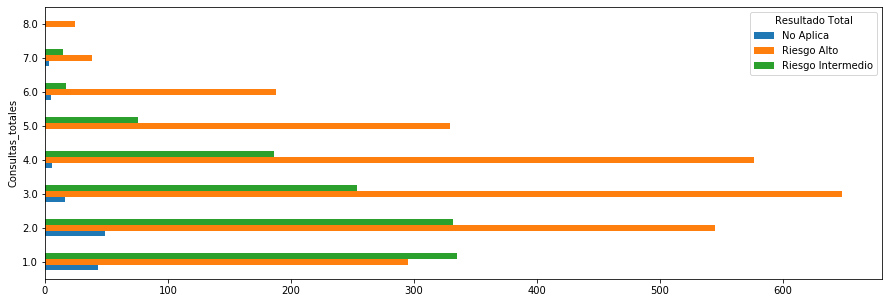

In [6]:
df_ra_g0.groupby(['Consultas_totales']).sum().plot(kind='barh',figsize=(15,5))

In [7]:
df_ra_g1=df_Riesgo_asociado.groupby(['Resultado Total'],as_index=True).nunique()
df_ra_g1 #Mapeo de Resultado Total

,ID,Fecha,Resultado Total,Pregunta,Respuesta,Sede de atención
Resultado Total,,,,,,
No Aplica,102,122,1,23,4,2
Riesgo Alto,1170,2641,1,23,4,2
Riesgo Intermedio,807,1215,1,23,4,2


In [8]:
df_ra_g2=df_Riesgo_asociado.groupby(['Pregunta'],as_index=True).nunique()
df_ra_g2 #Mapeo de Pregunta

,ID,Fecha,Resultado Total,Pregunta,Respuesta,Sede de atención
Pregunta,,,,,,
Artritis psoriasica -> Diagnostico confirmado,1522,3089,3,1,4,2
Consumo de sustancias psicoactivas -> Consumo activo,1522,3089,3,1,4,2
DLQI -> > 10,1761,3975,3,1,4,2
DLQI -> Entre 6-10,1761,3974,3,1,4,2
Depresión -> Antecedente de depresión mayor,1761,3974,3,1,4,2
Depresión -> Depresión leve a moderada,1761,3974,3,1,4,2
Diabetes -> Diabetes controlada,1761,3974,3,1,4,2
Diabetes -> Difícil control y/o compromiso de órgano blanco,1761,3974,3,1,4,2
Dislipidemia -> (Hipercolesterolemia Y/o hipergliceridemia asociada),1714,3657,3,1,4,2


In [9]:
#Homogenización campo Pregunta ("Terapia sistémica de primera línea Tratamiento activo" no tenía el separador "->")
df_Riesgo_asociado.replace(to_replace=r'^Terapia sistémica de primera línea Tratamiento activo',value='Terapia sistémica de primera línea -> Tratamiento activo',regex=True,inplace=True)

In [10]:
df_ra_g2=df_Riesgo_asociado.groupby(['Pregunta'],as_index=True).nunique()
df_ra_g2

,ID,Fecha,Resultado Total,Pregunta,Respuesta,Sede de atención
Pregunta,,,,,,
Artritis psoriasica -> Diagnostico confirmado,1522,3089,3,1,4,2
Consumo de sustancias psicoactivas -> Consumo activo,1522,3089,3,1,4,2
DLQI -> > 10,1761,3975,3,1,4,2
DLQI -> Entre 6-10,1761,3974,3,1,4,2
Depresión -> Antecedente de depresión mayor,1761,3974,3,1,4,2
Depresión -> Depresión leve a moderada,1761,3974,3,1,4,2
Diabetes -> Diabetes controlada,1761,3974,3,1,4,2
Diabetes -> Difícil control y/o compromiso de órgano blanco,1761,3974,3,1,4,2
Dislipidemia -> (Hipercolesterolemia Y/o hipergliceridemia asociada),1714,3657,3,1,4,2


In [11]:
df_ra_g3=df_Riesgo_asociado.groupby(['Respuesta'],as_index=True).nunique()
df_ra_g3 #Mapeo de Respuesta

,ID,Fecha,Resultado Total,Pregunta,Respuesta,Sede de atención
Respuesta,,,,,,
0,1673,1883,3,22,1,2
1,1669,1879,3,22,1,2
NO,1100,2089,3,22,1,2
SÍ,1099,2086,3,22,1,2


In [12]:
df_ra_g4=df_Riesgo_asociado.groupby(['Pregunta','Respuesta'],as_index=True).nunique()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_ra_g4) #Mapeo de Pregunta vs Respuesta

ID  Fecha  \
Pregunta                                           Respuesta                
Artritis psoriasica -> Diagnostico confirmado      0           864    915   
                                                   1            84     86   
                                                   NO         1086   2049   
                                                   SÍ           32     39   
Consumo de sustancias psicoactivas -> Consumo a... 0           919    976   
                                                   1            25     25   
                                                   NO         1025   1901   
                                                   SÍ          141    187   
DLQI -> > 10                                       0          1274   1384   
                                                   1           456    499   
                                                   NO         1039   1891   
                                                   SÍ          154    199   
DLQI -> Entre 6-10                                 0          1625   1820   
                                                   1            61     63   
                                                   NO         1076   2002   
                                                   SÍ           79     86   
Depresión -> Antecedente de depresión mayor        0          1574   1766   
                                                   1           112    117   
                                                   NO         1089   2058   
                                                   SÍ           24     30   
Depresión -> Depresión leve a moderada             0          1385   1556   
                                                   1           304    327   
                                                   NO         1094   2063   
                                                   SÍ           23     25   
Diabetes -> Diabetes controlada                    0          1239   1378   
                                                   1           477    505   
                                                   NO         1068   2003   
                                                   SÍ           65     86   
Diabetes -> Difícil control y/o compromiso de ó... 0          1596   1794   
                                                   1            85     89   
                                                   NO         1083   2040   
                                                   SÍ           34     48   
Dislipidemia -> (Hipercolesterolemia Y/o hiperg... 0           915    993   
                                                   1           533    573   
                                                   NO          995   1806   
                                                   SÍ          212    282   
Enfermedad cardiovascualar -> Evento cardio cer... 0          1320   1468   
                                                   1           380    415   
                                                   NO         1092   2060   
                                                   SÍ           19     28   
Fototerapia -> Tratamiento previo sin mejoría c... 0          1611   1804   
                                                   1            75     79   
                                                   NO         1043   1872   
                                                   SÍ          157    218   
HTA -> HTA controlada                              0          1585   1775   
                                                   1           103    108   
                                                   NO         1008   1878   
                                                   SÍ          164    210   
HTA -> HTA no controlada Y/o compromiso de órga... 0          1640   1845   
                                                   1            37     38   
                                                   NO       

In [13]:
df_ra_g5=df_Riesgo_asociado.copy()
df_ra_g5['YM']=df_ra_g5['Fecha'].dt.to_period("M")
df_ra_g5_fecha=df_ra_g5.groupby(['YM','Respuesta'],as_index=True).nunique()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_ra_g5_fecha) #Mapeo de Respuesta vs Fecha

ID  Fecha  Resultado Total  Pregunta  Respuesta  \
YM      Respuesta                                                     
2018-05 0          102    110                2        18          1   
        1          102    110                2        18          1   
2018-06 0          126    129                2        18          1   
        1          126    129                2        18          1   
2018-07 0          134    147                3        20          1   
        1          133    146                2        20          1   
2018-08 0          183    200                2        20          1   
        1          183    200                2        20          1   
2018-09 0          125    129                3        20          1   
        1          124    128                2        19          1   
2018-10 0           90     91                2        20          1   
        1           90     91                2        18          1   
2018-11 0           67     68                2        20          1   
        1           67     68                2        15          1   
2018-12 0           55     57                2        22          1   
        1           55     57                2        18          1   
2019-01 0           52     54                2        22          1   
        1           52     54                2        22          1   
        NO          65     65                2        22          1   
        SÍ          65     65                2        20          1   
2019-02 0           70     72                2        22          1   
        1           70     72                2        20          1   
        NO         128    128                2        22          1   
        SÍ         128    128                2        22          1   
2019-03 0           35     37                2        22          1   
        1           35     37                2        18          1   
        NO         155    159                2        22          1   
        SÍ         155    159                2        20          1   
2019-04 0           42     42                2        22          1   
        1           42     42                2        20          1   
        NO           3      3                1        21          1   
        SÍ           3      3                1         8          1   
2019-05 0           37     37                2        22          1   
        1           37     37                2        17          1   
2019-06 0           46     46                2        22          1   
        1           46     46                2        17          1   
2019-07 0           90     94                3        22          1   
        1           89     93                2        22          1   
2019-08 0          130    133                2        22          1   
        1          130    133                2        22          1   
        NO         193    201                2        22          1   
        SÍ         193    201                2        22          1   
2019-09 0           89     94                2        22          1   
        1           89     94                2        21          1   
        NO         227    236                2        22          1   
        SÍ         227    236                2        22          1   
2019-10 0           62     62                2        22          1   
        1           62     62                2        19          1   
        NO         239    330                3        22          1   
        SÍ         238    329                2        22          1   
2019-11 0           10     10                2        22          1   
        1           10     10                2        13          1   
        NO          19     19                2        22          1   
        SÍ          19     19                2        14          1   
2020-01 0           52     53               

In [14]:
df_ra_g5_fecha=df_ra_g5.groupby(['YM','Respuesta'],as_index=True).nunique().unstack('Respuesta')
df_ra_g5_fecha[['Respuesta']]#.plot(kind='bar',figsize=(15,5))

Respuesta               
Respuesta         0    1   NO   SÍ
YM                                
2018-05         1.0  1.0  NaN  NaN
2018-06         1.0  1.0  NaN  NaN
2018-07         1.0  1.0  NaN  NaN
2018-08         1.0  1.0  NaN  NaN
2018-09         1.0  1.0  NaN  NaN
2018-10         1.0  1.0  NaN  NaN
2018-11         1.0  1.0  NaN  NaN
2018-12         1.0  1.0  NaN  NaN
2019-01         1.0  1.0  1.0  1.0
2019-02         1.0  1.0  1.0  1.0
2019-03         1.0  1.0  1.0  1.0
2019-04         1.0  1.0  1.0  1.0
2019-05         1.0  1.0  NaN  NaN
2019-06         1.0  1.0  NaN  NaN
2019-07         1.0  1.0  NaN  NaN
2019-08         1.0  1.0  1.0  1.0
2019-09         1.0  1.0  1.0  1.0
2019-10         1.0  1.0  1.0  1.0
2019-11         1.0  1.0  1.0  1.0
2020-01         1.0  1.0  1.0  1.0
2020-02         1.0  1.0  1.0  1.0
2020-03         1.0  1.0  1.0  1.0
2020-04         1.0  1.0  NaN  NaN
2020-05         1.0  1.0  1.0  1.0

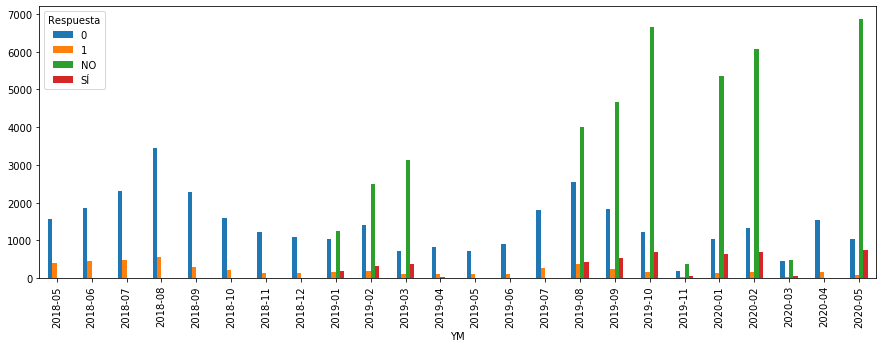

In [15]:
df_ra_g5_fecha=df_ra_g5.groupby(['YM','Respuesta'],as_index=True).count().unstack('Respuesta')
df_ra_g5_fecha['ID'].plot(kind='bar',figsize=(15,5))

In [16]:
#Homogenización campo Respuesta (antes de enero de 2019 no se usaba "SÍ" y "NO")
df_Riesgo_asociado.replace({'Respuesta': 1},{'Respuesta': 'SÍ'},inplace=True)#,regex=True)
df_Riesgo_asociado.replace({'Respuesta': 0},{'Respuesta': 'NO'},inplace=True)#,regex=True)
df_Riesgo_asociado.groupby(['Respuesta'],as_index=True).nunique()

,ID,Fecha,Resultado Total,Pregunta,Respuesta,Sede de atención
Respuesta,,,,,,
NO,1761,3972,3,22,1,2
SÍ,1757,3965,3,22,1,2


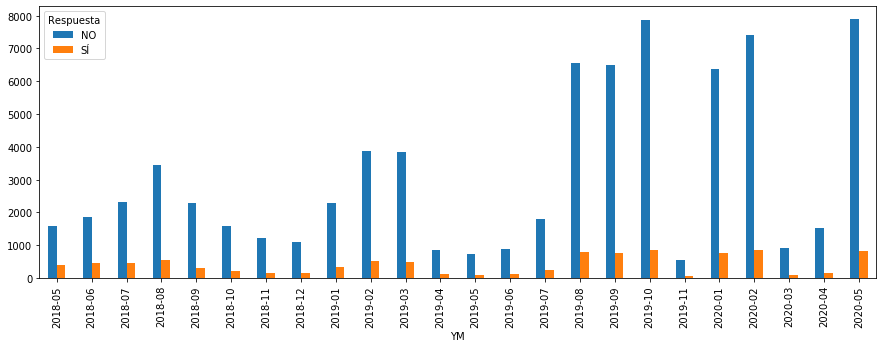

In [17]:
df_ra_g5=df_Riesgo_asociado.copy()
df_ra_g5['YM']=df_ra_g5['Fecha'].dt.to_period("M")
df_ra_g5_fecha=df_ra_g5.groupby(['YM','Respuesta'],as_index=True).count().unstack('Respuesta')
df_ra_g5_fecha['ID'].plot(kind='bar',figsize=(15,5))

In [18]:
#df_Riesgo_asociado.loc[(df_Riesgo_asociado['Resultado Total']=='No Aplica') & ((df_Riesgo_asociado['Respuesta']=='SÍ') | (df_Riesgo_asociado['Respuesta']==1))].groupby(['Resultado Total','Pregunta','Respuesta']).count().unstack('Respuesta')
#Repuestas y preguntas relacionadas con Riesgo Alto
df_Riesgo_asociado.loc[(df_Riesgo_asociado['Resultado Total']=='Riesgo Alto')].groupby(['Resultado Total','Pregunta','Respuesta']).count().unstack('Respuesta')['ID'].sort_values('SÍ',ascending=False)

Respuesta                                                             NO    SÍ
Resultado Total Pregunta                                                      
Riesgo Alto     Terapia biológica -> Tratamiento activo             1165  1477
                Terapia sistématica previa -> Tratamiento previ...  1954   688
                DLQI -> > 10                                        2015   627
                Terapia sistémica de primera línea -> Tratamien...  1828   528
                PASI -> > 15 sin tratamiento previo                 2133   509
                Dislipidemia -> (Hipercolesterolemia Y/o hiperg...  1907   450
                IMC -> 26-29                                        2258   383
                Diabetes -> Diabetes controlada                     2263   378
                Enfermedad cardiovascualar -> Evento cardio cer...  2267   374
                IMC -> > 30                                         2302   339
                Fototerapia -> Tratamiento previo sin mejoría c...  2360   282
                Depresión -> Depresión leve a moderada              2397   244
                HTA -> HTA controlada                               2404   237
                Consumo de sustancias psicoactivas -> Consumo a...  1812   208
                PASI -> Entre 10-15                                 2438   203
                Terapia biológica -> Medicamento que requiere a...  2486   156
                Diabetes -> Difícil control y/o compromiso de ó...  2514   127
                Artritis psoriasica -> Diagnostico confirmado       1897   123
                Depresión -> Antecedente de depresión mayor         2520   121
                DLQI -> Entre 6-10                                  2545    96
                HTA -> HTA no controlada Y/o compromiso de órga...  2562    79
                Sindrome metabolico -> Presencia de síndrome me...  2584    57

In [19]:
#Repuestas y preguntas relacionadas con Riesgo Intermedio
df_Riesgo_asociado.loc[(df_Riesgo_asociado['Resultado Total']=='Riesgo Intermedio')].groupby(['Resultado Total','Pregunta','Respuesta']).count().unstack('Respuesta')['ID'].sort_values('SÍ',ascending=False)

Respuesta                                                                 NO  \
Resultado Total   Pregunta                                                     
Riesgo Intermedio Terapia sistémica de primera línea -> Tratamien...   719.0   
                  Dislipidemia -> (Hipercolesterolemia Y/o hiperg...   808.0   
                  Diabetes -> Diabetes controlada                     1021.0   
                  IMC -> 26-29                                        1054.0   
                  PASI -> Entre 10-15                                 1075.0   
                  Depresión -> Depresión leve a moderada              1117.0   
                  PASI -> > 15 sin tratamiento previo                 1118.0   
                  HTA -> HTA controlada                               1143.0   
                  DLQI -> > 10                                        1146.0   
                  Terapia sistématica previa -> Tratamiento previ...  1151.0   
                  Enfermedad cardiovascualar -> Evento cardio cer...  1156.0   
                  DLQI -> Entre 6-10                                  1167.0   
                  IMC -> > 30                                         1175.0   
                  Depresión -> Antecedente de depresión mayor         1188.0   
                  Fototerapia -> Tratamiento previo sin mejoría c...  1200.0   
                  Terapia biológica -> Medicamento que requiere a...  1206.0   
                  Diabetes -> Difícil control y/o compromiso de ó...  1208.0   
                  HTA -> HTA no controlada Y/o compromiso de órga...  1209.0   
                  Sindrome metabolico -> Presencia de síndrome me...  1210.0   
                  Artritis psoriasica -> Diagnostico confirmado        954.0   
                  Consumo de sustancias psicoactivas -> Consumo a...   954.0   
                  Terapia biológica -> Tratamiento activo             1213.0   

Respuesta                                                                SÍ  
Resultado Total   Pregunta                                                   
Riesgo Intermedio Terapia sistémica de primera línea -> Tratamien...  460.0  
                  Dislipidemia -> (Hipercolesterolemia Y/o hiperg...  372.0  
                  Diabetes -> Diabetes controlada                     192.0  
                  IMC -> 26-29                                        159.0  
                  PASI -> Entre 10-15                                 138.0  
                  Depresión -> Depresión leve a moderada               96.0  
                  PASI -> > 15 sin tratamiento previo                  95.0  
                  HTA -> HTA controlada                                70.0  
                  DLQI -> > 10                                         67.0  
                  Terapia sistématica previa -> Tratamiento previ...   62.0  
                  Enfermedad cardiovascualar -> Evento cardio cer...   57.0  
                  DLQI -> Entre 6-10                                   46.0  
                  IMC -> > 30                                          38.0  
                  Depresión -> Antecedente de depresión mayor          25.0  
                  Fototerapia -> Tratamiento previo sin mejoría c...   13.0  
                  Terapia biológica -> Medicamento que requiere a...    7.0  
                  Diabetes -> Difícil control y/o compromiso de ó...    5.0  
                  HTA -> HTA no controlada Y/o compromiso de órga...    4.0  
                  Sindrome metabolico -> Presencia de síndrome me...    3.0  
                  Artritis psoriasica -> Diagnostico confirmado         NaN  
                  Consumo de sustancias psicoactivas -> Consumo a...    NaN  
                  Terapia biológica -> Tratamiento activo               NaN

In [20]:
#Repuestas y preguntas relacionadas con No Aplica
df_Riesgo_asociado.loc[(df_Riesgo_asociado['Resultado Total']=='No Aplica')].groupby(['Resultado Total','Pregunta','Respuesta']).count().unstack('Respuesta')['ID'].sort_values('SÍ',ascending=False)

Respuesta                                                              NO  \
Resultado Total Pregunta                                                    
No Aplica       IMC -> 26-29                                         80.0   
                Dislipidemia -> (Hipercolesterolemia Y/o hiperg...   89.0   
                Diabetes -> Diabetes controlada                     101.0   
                IMC -> > 30                                         109.0   
                Depresión -> Depresión leve a moderada              110.0   
                Enfermedad cardiovascualar -> Evento cardio cer...  110.0   
                HTA -> HTA controlada                               111.0   
                Terapia sistémica de primera línea -> Tratamien...  112.0   
                PASI -> Entre 10-15                                 113.0   
                DLQI -> Entre 6-10                                  115.0   
                PASI -> > 15 sin tratamiento previo                 115.0   
                Diabetes -> Difícil control y/o compromiso de ó...  117.0   
                DLQI -> > 10                                        118.0   
                Terapia sistématica previa -> Tratamiento previ...  118.0   
                Consumo de sustancias psicoactivas -> Consumo a...  116.0   
                HTA -> HTA no controlada Y/o compromiso de órga...  118.0   
                Artritis psoriasica -> Diagnostico confirmado       118.0   
                Fototerapia -> Tratamiento previo sin mejoría c...  120.0   
                Sindrome metabolico -> Presencia de síndrome me...  121.0   
                Depresión -> Antecedente de depresión mayor         121.0   
                Terapia biológica -> Medicamento que requiere a...  122.0   
                Terapia biológica -> Tratamiento activo             122.0   

Respuesta                                                             SÍ  
Resultado Total Pregunta                                                  
No Aplica       IMC -> 26-29                                        42.0  
                Dislipidemia -> (Hipercolesterolemia Y/o hiperg...  33.0  
                Diabetes -> Diabetes controlada                     21.0  
                IMC -> > 30                                         13.0  
                Depresión -> Depresión leve a moderada              12.0  
                Enfermedad cardiovascualar -> Evento cardio cer...  12.0  
                HTA -> HTA controlada                               11.0  
                Terapia sistémica de primera línea -> Tratamien...  10.0  
                PASI -> Entre 10-15                                  9.0  
                DLQI -> Entre 6-10                                   7.0  
                PASI -> > 15 sin tratamiento previo                  7.0  
                Diabetes -> Difícil control y/o compromiso de ó...   5.0  
                DLQI -> > 10                                         4.0  
                Terapia sistématica previa -> Tratamiento previ...   4.0  
                Consumo de sustancias psicoactivas -> Consumo a...   4.0  
                HTA -> HTA no controlada Y/o compromiso de órga...   4.0  
                Artritis psoriasica -> Diagnostico confirmado        2.0  
                Fototerapia -> Tratamiento previo sin mejoría c...   2.0  
                Sindrome metabolico -> Presencia de síndrome me...   1.0  
                Depresión -> Antecedente de depresión mayor          1.0  
                Terapia biológica -> Medicamento que requiere a...   NaN  
                Terapia biológica -> Tratamiento activo              NaN

In [21]:
df_ra_6 = df_Riesgo_asociado.copy()
df_ra_6 = pd.DataFrame(df_Riesgo_asociado['Pregunta'].str.split(pat=" -> ").values.tolist())
df_ra_6

,0,1
0,Terapia biológica,Tratamiento activo
1,Terapia biológica,Medicamento que requiere ajuste de dosis por peso
2,PASI,> 15 sin tratamiento previo
3,DLQI,> 10
4,Terapia sistématica previa,Tratamiento previo con fallo terapéutico
...,...,...
85133,IMC,26-29
85134,Dislipidemia,(Hipercolesterolemia Y/o hipergliceridemia aso...
85135,Terapia sistémica de primera línea,Tratamiento activo
85136,Artritis psoriasica,Diagnostico confirmado


In [22]:
c1=df_ra_6[0]
c2=df_ra_6[1]
print(len(c1)+len(c2))

170276


In [23]:
df_ra_7 = df_Riesgo_asociado.copy()
df_ra_7['Pregunta_Head'] = c1
df_ra_7['Pregunta_Tail'] = c2
#df_Fenotipos_v4 = df_Fenotipos_v4.append(c3, ignore_index=True)
#df_Fenotipos_v4 = df_Fenotipos_v4.append(c4, ignore_index=True)
#df_Fenotipos_v4 = df_Fenotipos_v4.str.strip()
#df_Fenotipos_v4 = df_Fenotipos_v4.to_frame()
df_ra_7.head(5)

,ID,Fecha,Resultado Total,Pregunta,Respuesta,Sede de atención,Pregunta_Head,Pregunta_Tail
0,2514536,2020-04-22 10:44:02,No Aplica,Terapia biológica -> Tratamiento activo,NO,Almacentro Piso 11,Terapia biológica,Tratamiento activo
1,2514536,2020-04-22 10:44:02,No Aplica,Terapia biológica -> Medicamento que requiere ...,NO,Almacentro Piso 11,Terapia biológica,Medicamento que requiere ajuste de dosis por peso
2,2514536,2020-04-22 10:44:02,No Aplica,PASI -> > 15 sin tratamiento previo,NO,Almacentro Piso 11,PASI,> 15 sin tratamiento previo
3,2514536,2020-04-22 10:44:02,No Aplica,DLQI -> > 10,NO,Almacentro Piso 11,DLQI,> 10
4,2514536,2020-04-22 10:44:02,No Aplica,Terapia sistématica previa -> Tratamiento prev...,NO,Almacentro Piso 11,Terapia sistématica previa,Tratamiento previo con fallo terapéutico


In [24]:
print(df_Riesgo_asociado.shape)
print(df_ra_7.shape)

(85138, 6)
(85138, 8)


In [25]:
#Repuestas y preguntas ***separadas*** relacionadas con Riesgo Alto
df_ra_8=df_ra_7.loc[(df_ra_7['Resultado Total']=='Riesgo Alto')].groupby(['Resultado Total','Pregunta_Head','Pregunta_Tail','Respuesta']).count().unstack(level=(3))['ID']#.sort_values('SÍ',ascending=False)
df_ra_8['SI_vs_Total']=df_ra_8['NO']/df_ra_8['SÍ']
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_ra_8) #

Respuesta                                                                                                NO  \
Resultado Total Pregunta_Head                      Pregunta_Tail                                              
Riesgo Alto     Artritis psoriasica                Diagnostico confirmado                              1897   
                Consumo de sustancias psicoactivas Consumo activo                                      1812   
                DLQI                               > 10                                                2015   
                                                   Entre 6-10                                          2545   
                Depresión                          Antecedente de depresión mayor                      2520   
                                                   Depresión leve a moderada                           2397   
                Diabetes                           Diabetes controlada                                 2263   
                                                   Difícil control y/o compromiso de órgano blanco     2514   
                Dislipidemia                       (Hipercolesterolemia Y/o hipergliceridemia asoc...  1907   
                Enfermedad cardiovascualar         Evento cardio cerebro vascular previo               2267   
                Fototerapia                        Tratamiento previo sin mejoría clínica              2360   
                HTA                                HTA controlada                                      2404   
                                                   HTA no controlada Y/o compromiso de órgano blanco   2562   
                IMC                                26-29                                               2258   
                                                   > 30                                                2302   
                PASI                               > 15 sin tratamiento previo                         2133   
                                                   Entre 10-15                                         2438   
                Sindrome metabolico                Presencia de síndrome metabólico completo           2584   
                Terapia biológica                  Medicamento que requiere ajuste de dosis por peso   2486   
                                                   Tratamiento activo                                  1165   
                Terapia sistématica previa         Tratamiento previo con fallo terapéutico            1954   
                Terapia sistémica de primera línea Tratamiento activo                                  1828   

Respuesta                                                                                                SÍ  \
Resultado Total Pregunta_Head                      Pregunta_Tail                                              
Riesgo Alto     Artritis psoriasica                Diagnostico confirmado                               123   
                Consumo de sustancias psicoactivas Consumo activo                                       208   
                DLQI                               > 10                                                 627   
                                                   Entre 6-10                                            96   
                Depresión                          Antecedente de depresión mayor                       121   
                                                   Depresión leve a moderada                            244   
                Diabetes                           Diabetes controlada                                  378   
                                                   Difícil control y/o compromiso de órgano blanco      127   
                Dislipidemia                       (Hipercolesterolemia Y/o hipergliceridemia asoc...   450   
                Enfermedad cardiovascualar         Evento cardio cerebro vascular previo                374   
   

In [26]:
#Repuestas y preguntas ***separadas*** relacionadas con Riesgo Intermedio
df_ra_9=df_ra_7.loc[(df_ra_7['Resultado Total']=='Riesgo Intermedio')].groupby(['Resultado Total','Pregunta_Head','Pregunta_Tail','Respuesta']).nunique().unstack(level=(3))['ID']#.sort_values('SÍ',ascending=False)
df_ra_9['SI_vs_Total']=df_ra_9['NO']/df_ra_9['SÍ']
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_ra_9) #

Respuesta                                                                                                   NO  \
Resultado Total   Pregunta_Head                      Pregunta_Tail                                               
Riesgo Intermedio Artritis psoriasica                Diagnostico confirmado                              639.0   
                  Consumo de sustancias psicoactivas Consumo activo                                      639.0   
                  DLQI                               > 10                                                779.0   
                                                     Entre 6-10                                          793.0   
                  Depresión                          Antecedente de depresión mayor                      790.0   
                                                     Depresión leve a moderada                           741.0   
                  Diabetes                           Diabetes controlada                                 676.0   
                                                     Difícil control y/o compromiso de órgano blanco     804.0   
                  Dislipidemia                       (Hipercolesterolemia Y/o hipergliceridemia asoc...  569.0   
                  Enfermedad cardiovascualar         Evento cardio cerebro vascular previo               773.0   
                  Fototerapia                        Tratamiento previo sin mejoría clínica              802.0   
                  HTA                                HTA controlada                                      760.0   
                                                     HTA no controlada Y/o compromiso de órgano blanco   805.0   
                  IMC                                26-29                                               723.0   
                                                     > 30                                                789.0   
                  PASI                               > 15 sin tratamiento previo                         747.0   
                                                     Entre 10-15                                         723.0   
                  Sindrome metabolico                Presencia de síndrome metabólico completo           805.0   
                  Terapia biológica                  Medicamento que requiere ajuste de dosis por peso   804.0   
                                                     Tratamiento activo                                  807.0   
                  Terapia sistématica previa         Tratamiento previo con fallo terapéutico            779.0   
                  Terapia sistémica de primera línea Tratamiento activo                                  632.0   

Respuesta                                                                                                   SÍ  \
Resultado Total   Pregunta_Head                      Pregunta_Tail                                               
Riesgo Intermedio Artritis psoriasica                Diagnostico confirmado                                NaN   
                  Consumo de sustancias psicoactivas Consumo activo                                        NaN   
                  DLQI                               > 10                                                 63.0   
                                                     Entre 6-10                                           42.0   
                  Depresión                          Antecedente de depresión mayor                       25.0   
                                                     Depresión leve a moderada                            94.0   
                  Diabetes                           Diabetes controlada                                 186.0   
                                                     Difícil control y/o compromiso de órgano blanco       5.0   
                  Dislipidemia                       (Hipercolesterolemia Y/o hipergliceridemia asoc...  340.0   
         

In [27]:
#Repuestas y preguntas ***separadas*** relacionadas con No Aplica
df_ra_10=df_ra_7.loc[(df_ra_7['Resultado Total']=='No Aplica')].groupby(['Resultado Total','Pregunta_Head','Pregunta_Tail','Respuesta']).count().unstack(level=(3))['ID']#.sort_values('SÍ',ascending=False)
df_ra_10['SI_vs_Total']=df_ra_10['NO']/df_ra_10['SÍ']
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_ra_10) #

Respuesta                                                                                                 NO  \
Resultado Total Pregunta_Head                      Pregunta_Tail                                               
No Aplica       Artritis psoriasica                Diagnostico confirmado                              118.0   
                Consumo de sustancias psicoactivas Consumo activo                                      116.0   
                DLQI                               > 10                                                118.0   
                                                   Entre 6-10                                          115.0   
                Depresión                          Antecedente de depresión mayor                      121.0   
                                                   Depresión leve a moderada                           110.0   
                Diabetes                           Diabetes controlada                                 101.0   
                                                   Difícil control y/o compromiso de órgano blanco     117.0   
                Dislipidemia                       (Hipercolesterolemia Y/o hipergliceridemia asoc...   89.0   
                Enfermedad cardiovascualar         Evento cardio cerebro vascular previo               110.0   
                Fototerapia                        Tratamiento previo sin mejoría clínica              120.0   
                HTA                                HTA controlada                                      111.0   
                                                   HTA no controlada Y/o compromiso de órgano blanco   118.0   
                IMC                                26-29                                                80.0   
                                                   > 30                                                109.0   
                PASI                               > 15 sin tratamiento previo                         115.0   
                                                   Entre 10-15                                         113.0   
                Sindrome metabolico                Presencia de síndrome metabólico completo           121.0   
                Terapia biológica                  Medicamento que requiere ajuste de dosis por peso   122.0   
                                                   Tratamiento activo                                  122.0   
                Terapia sistématica previa         Tratamiento previo con fallo terapéutico            118.0   
                Terapia sistémica de primera línea Tratamiento activo                                  112.0   

Respuesta                                                                                                SÍ  \
Resultado Total Pregunta_Head                      Pregunta_Tail                                              
No Aplica       Artritis psoriasica                Diagnostico confirmado                               2.0   
                Consumo de sustancias psicoactivas Consumo activo                                       4.0   
                DLQI                               > 10                                                 4.0   
                                                   Entre 6-10                                           7.0   
                Depresión                          Antecedente de depresión mayor                       1.0   
                                                   Depresión leve a moderada                           12.0   
                Diabetes                           Diabetes controlada                                 21.0   
                                                   Difícil control y/o compromiso de órgano blanco      5.0   
                Dislipidemia                       (Hipercolesterolemia Y/o hipergliceridemia asoc...  33.0   
                Enfermedad cardiovascualar         Evento cardio cerebro vascular previo  

In [28]:
df_ra_7['ID'].nunique()

1761

In [29]:
df_ra_7['ano']=df_ra_7['Fecha'].dt.year
df_ra_7['mes']=df_ra_7['Fecha'].dt.month
df_ra_7['dia']=df_ra_7['Fecha'].dt.day
df_ra_7

,ID,Fecha,Resultado Total,Pregunta,Respuesta,Sede de atención,Pregunta_Head,Pregunta_Tail,ano,mes,dia
0,2514536,2020-04-22 10:44:02,No Aplica,Terapia biológica -> Tratamiento activo,NO,Almacentro Piso 11,Terapia biológica,Tratamiento activo,2020,4,22
1,2514536,2020-04-22 10:44:02,No Aplica,Terapia biológica -> Medicamento que requiere ...,NO,Almacentro Piso 11,Terapia biológica,Medicamento que requiere ajuste de dosis por peso,2020,4,22
2,2514536,2020-04-22 10:44:02,No Aplica,PASI -> > 15 sin tratamiento previo,NO,Almacentro Piso 11,PASI,> 15 sin tratamiento previo,2020,4,22
3,2514536,2020-04-22 10:44:02,No Aplica,DLQI -> > 10,NO,Almacentro Piso 11,DLQI,> 10,2020,4,22
4,2514536,2020-04-22 10:44:02,No Aplica,Terapia sistématica previa -> Tratamiento prev...,NO,Almacentro Piso 11,Terapia sistématica previa,Tratamiento previo con fallo terapéutico,2020,4,22
...,...,...,...,...,...,...,...,...,...,...,...
85133,3430743,2020-05-30 12:19:46,Riesgo Alto,IMC -> 26-29,NO,Almacentro Piso 11,IMC,26-29,2020,5,30
85134,3430743,2020-05-30 12:19:46,Riesgo Alto,Dislipidemia -> (Hipercolesterolemia Y/o hiper...,NO,Almacentro Piso 11,Dislipidemia,(Hipercolesterolemia Y/o hipergliceridemia aso...,2020,5,30
85135,3430743,2020-05-30 12:19:46,Riesgo Alto,Terapia sistémica de primera línea -> Tratamie...,NO,Almacentro Piso 11,Terapia sistémica de primera línea,Tratamiento activo,2020,5,30
85136,3430743,2020-05-30 12:19:46,Riesgo Alto,Artritis psoriasica -> Diagnostico confirmado,NO,Almacentro Piso 11,Artritis psoriasica,Diagnostico confirmado,2020,5,30


In [31]:
import unicodedata
def rem_accents(text):
    return unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

In [32]:
columns = df_ra_7.columns
new_columns = {}
for i in columns:
    new_columns[i] = rem_accents(i).lower().replace(" ","_")

In [33]:
for i in columns:
    df_ra_7[i] = df_ra_7[i].apply(lambda x: rem_accents(str(x).lower()))

In [36]:
df_ra_7.rename(columns=new_columns, inplace=True)
df_ra_7.head()

,id,fecha,resultado_total,pregunta,respuesta,sede_de_atencion,pregunta_head,pregunta_tail,ano,mes,dia
0,2514536,2020-04-22 10:44:02,no aplica,terapia biologica -> tratamiento activo,no,almacentro piso 11,terapia biologica,tratamiento activo,2020,4,22
1,2514536,2020-04-22 10:44:02,no aplica,terapia biologica -> medicamento que requiere ...,no,almacentro piso 11,terapia biologica,medicamento que requiere ajuste de dosis por peso,2020,4,22
2,2514536,2020-04-22 10:44:02,no aplica,pasi -> > 15 sin tratamiento previo,no,almacentro piso 11,pasi,> 15 sin tratamiento previo,2020,4,22
3,2514536,2020-04-22 10:44:02,no aplica,dlqi -> > 10,no,almacentro piso 11,dlqi,> 10,2020,4,22
4,2514536,2020-04-22 10:44:02,no aplica,terapia sistematica previa -> tratamiento prev...,no,almacentro piso 11,terapia sistematica previa,tratamiento previo con fallo terapeutico,2020,4,22


In [39]:
df_ra_7["fecha"] = pd.to_datetime(df_ra_7["fecha"])

In [41]:
df_ra_7.dtypes

id                          object
fecha               datetime64[ns]
resultado_total             object
pregunta                    object
respuesta                   object
sede_de_atencion            object
pregunta_head               object
pregunta_tail               object
ano                         object
mes                         object
dia                         object
dtype: object

In [40]:
df_ra_7.to_csv("data/Riesgo_asociado_DF.csv", index = False)